# Clinical Deterioration Model: Exploratory Data Analysis

#### This notebook includes an EDA of final dataset prepared for a clinical deterioration model 

## 1. Data Source 

For this project, I used publicly available Electronic Health Records (EHRs) datasets. The MIT Media Lab for Computational Physiology has developed MIMIC-IIIv1.4 dataset based on 46,520 patients who stayed in critical care units of the Beth Israel Deaconess Medical Center of Boston between 2001 and 2012. MIMIC-IIIv1.4 dataset is freely available to researchers across the world. A formal request should be made directly to www.mimic.physionet.org, to gain acess to the data. There is a required course on human research ‘Data or Specimens Only Research’ prior to data acess request. I have secured one here -www.citiprogram.org/verify/?kb6607b78-5821-4de5-8cad-daf929f7fbbf-33486907

The dataset has 26 relational tables including patient’s hospital admission, callout information when patient was ready for discharge, caregiver information, electronic charted events including vital signs and any additional information relevant to patient care, patient demographic data, list of services the patient was admitted or transferred under,  ICU stay types, diagnoses types, laboratory measurments, microbiology tests and sensitivity, prescription data and billing information. 

Although I have full access to the MIMIC-IIIv1.4 datasets, I can not share any part of the data publicly. If you are interested to learn more about the data, there is a MIMIC III Demo dataset based on 100 patients https://mimic.physionet.org/gettingstarted/demo/. If you are interested to requesting access to the data - https://mimic.physionet.org/gettingstarted/access/. 


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import random
import sys
import csv
import re

In [2]:
os.getcwd()

'C:\\Users\\abebu\\Dropbox\\Data Science\\Projects\\Capstone Project 1\\Potential Projects\\9. MIMIC\\EDA\\Exploratory-Data-Analysis-Clinical-Deterioration'

In [3]:
os.chdir("C://Users/abebu/Google Drive/mimic-iii-clinical-database-1.4")

In [32]:
saps=pd.read_csv('saps_ts.csv', header=0, index_col=0)
saps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61117 entries, 0 to 61116
Data columns (total 33 columns):
SUBJECT_ID       61117 non-null int64
HADM_ID          61117 non-null int64
ICUSTAY_ID       61117 non-null int64
los              61117 non-null float64
hdeath           61117 non-null int64
death            61117 non-null int64
admission        61117 non-null int64
ud               61117 non-null float64
bun              61117 non-null float64
Bicarbonate      61117 non-null float64
ventilation      61117 non-null float64
Temp             61117 non-null float64
Bilirubin        61117 non-null float64
gcs              61117 non-null float64
AGE              61117 non-null float64
UO               61117 non-null float64
saps2            61117 non-null float64
Potassium_0.0    61117 non-null int64
Potassium_3.0    61117 non-null int64
Sodium_0.0       61117 non-null int64
Sodium_1.0       61117 non-null int64
Sodium_5.0       61117 non-null int64
WBC_0.0          61117 non-null i

In [5]:
demo=pd.read_csv('demography.csv', header=0, index_col=0)
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58976 entries, 0 to 58975
Data columns (total 7 columns):
SUBJECT_ID        58976 non-null int64
GENDER            58976 non-null object
HADM_ID           58976 non-null int64
INSURANCE         58976 non-null object
RELIGION          58518 non-null object
MARITAL_STATUS    48848 non-null object
ETHNICITY         58976 non-null object
dtypes: int64(2), object(5)
memory usage: 3.6+ MB


In [33]:
def adm_merge(table1, table2):
    return table1.merge(table2, how='inner', left_on=['SUBJECT_ID','HADM_ID'], right_on=['SUBJECT_ID','HADM_ID'])

In [34]:
saps=adm_merge(saps, demo)
saps.head()

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,los,hdeath,death,admission,ud,bun,Bicarbonate,...,hr_11.0,bp_0.0,bp_2.0,bp_5.0,bp_13.0,GENDER,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY
0,268,110404,280836,3.2490,1,1,8,0.0,6.0,0.0,...,1,0,0,0,1,F,Medicare,CATHOLIC,SEPARATED,HISPANIC OR LATINO
1,269,106296,206613,3.2788,0,0,8,17.0,0.0,0.0,...,0,0,0,1,0,M,Medicaid,UNOBTAINABLE,SINGLE,WHITE
2,270,188028,220345,2.8939,0,0,0,0.0,0.0,0.0,...,1,0,0,0,1,M,Medicare,JEHOVAH'S WITNESS,MARRIED,UNKNOWN/NOT SPECIFIED
3,271,173727,249196,2.0600,0,0,8,0.0,0.0,0.0,...,0,1,0,0,0,F,Private,NOT SPECIFIED,MARRIED,PATIENT DECLINED TO ANSWER
4,272,164716,210407,1.6202,0,0,8,0.0,0.0,0.0,...,0,0,0,1,0,M,Medicare,UNOBTAINABLE,MARRIED,WHITE


In [81]:
saps_d=pd.get_dummies(saps, columns=['GENDER', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY'])

In [83]:
saps_d=saps_d.drop(['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID'], axis=1)

## 1. Describe the Data 


In [87]:
desc_stat=saps_d.describe()
desc_stat

,los,hdeath,death,admission,ud,bun,Bicarbonate,ventilation,Temp,Bilirubin,...,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_WIDOWED,ETHNICITY_ASIAN,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_HISPANIC/LATINO,ETHNICITY_OTHERS,ETHNICITY_UNKNOWN/NOT SPECIFIED,ETHNICITY_WHITE
count,61117.000000,61117.000000,61117.000000,61117.000000,61117.000000,61117.000000,61117.000000,61117.000000,61117.000000,61117.000000,...,61117.000000,61117.00000,61117.000000,61117.000000,61117.000000,61117.000000,61117.000000,61117.000000,61117.000000,61117.000000
mean,4.957131,0.109249,0.395307,6.023987,1.123681,1.151071,0.352881,3.735262,2.336060,0.800187,...,0.009654,0.22560,0.005989,0.122732,0.032822,0.098140,0.035964,0.051966,0.077311,0.703798
std,9.668438,0.311955,0.488921,3.450170,3.139658,2.461039,1.158467,3.310800,1.245403,2.480805,...,0.097778,0.41798,0.077154,0.328132,0.178173,0.297506,0.186201,0.221960,0.267086,0.456585
min,0.000300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.120100,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.107000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,6.000000,3.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.540600,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,6.000000,3.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,173.072500,1.000000,1.000000,8.000000,17.000000,10.000000,6.000000,11.000000,3.000000,9.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
desc_stat.to_csv('desc_stat.csv')

In [18]:
# Number of patients (unieque)
saps['SUBJECT_ID'].nunique()

46234

In [85]:
saps['ICUSTAY_ID'].nunique()

60517

In [89]:
saps['admission'].value_counts(normalize=True) * 100

8    75.299835
0    24.700165
Name: admission, dtype: float64

In [90]:
saps['ud'].value_counts(normalize=True) * 100

0.0     88.283129
9.0      8.740612
10.0     2.413404
17.0     0.562855
Name: ud, dtype: float64

In [91]:
saps['bun'].value_counts(normalize=True) * 100

0.0     81.607409
6.0     17.204706
10.0     1.187886
Name: bun, dtype: float64

In [92]:
saps['Bicarbonate'].value_counts(normalize=True) * 100

0.0    90.503461
3.0     7.230394
6.0     2.266145
Name: Bicarbonate, dtype: float64

In [93]:
saps['ventilation'].value_counts(normalize=True) * 100

6.0     51.493038
0.0     41.903235
9.0      4.036520
11.0     2.567207
Name: ventilation, dtype: float64

In [94]:
saps['Temp'].value_counts(normalize=True) * 100

3.0    77.868678
0.0    22.131322
Name: Temp, dtype: float64

In [96]:
saps['Bilirubin'].value_counts(normalize=True) * 100

0.0    89.978238
9.0     7.986321
4.0     2.035440
Name: Bilirubin, dtype: float64

In [95]:
saps['gcs'].value_counts(normalize=True) * 100

0.0     48.133907
26.0    26.377276
5.0     18.975081
7.0      6.513736
Name: gcs, dtype: float64

In [182]:
saps['hr_11.0'].value_counts(normalize=True) * 100

0    94.052391
1     5.947609
Name: hr_11.0, dtype: float64

In [97]:
saps['UO'].value_counts(normalize=True) * 100

0.0    100.0
Name: UO, dtype: float64

In [123]:
fields = ['SUBJECT_ID', 'HADM_ID','ICUSTAY_ID', 'VALUE']
uo=pd.read_csv('urine_output.csv', usecols=fields)
uo

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,VALUE
0,3,145834.0,211552.0,602.0
1,3,145834.0,211552.0,1385.0
2,3,145834.0,211552.0,3670.0
3,3,145834.0,211552.0,4915.0
4,3,145834.0,211552.0,2900.0
...,...,...,...,...
271495,99995,137810.0,229633.0,335.0
271496,99995,137810.0,229633.0,1890.0
271497,99995,137810.0,229633.0,570.0
271498,99999,113369.0,246512.0,2320.0


In [124]:
uo=uo.groupby(['SUBJECT_ID', 'HADM_ID','ICUSTAY_ID'])['VALUE'].min().reset_index(name='VALUE')

In [125]:
uo.rename(columns = {'VALUE':'UO'}, inplace = True) 

In [126]:
uo

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,UO
0,3,145834.0,211552.0,602.0
1,4,185777.0,294638.0,1400.0
2,6,107064.0,228232.0,300.0
3,8,159514.0,262299.0,37.0
4,9,150750.0,220597.0,1354.0
...,...,...,...,...
53749,99985,176670.0,279638.0,818.0
53750,99991,151118.0,226241.0,920.0
53751,99992,197084.0,242052.0,675.0
53752,99995,137810.0,229633.0,335.0


In [127]:
uo.loc[uo['UO'] <500, 'UO'] = 11
uo.loc[uo['UO'].between(500, 999), 'UO'] = 4
uo.loc[uo['UO']>999, 'UO'] = 0
uo

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,UO
0,3,145834.0,211552.0,4.0
1,4,185777.0,294638.0,0.0
2,6,107064.0,228232.0,11.0
3,8,159514.0,262299.0,11.0
4,9,150750.0,220597.0,0.0
...,...,...,...,...
53749,99985,176670.0,279638.0,4.0
53750,99991,151118.0,226241.0,4.0
53751,99992,197084.0,242052.0,4.0
53752,99995,137810.0,229633.0,11.0


In [130]:
saps=saps.drop(['UO'], axis=1)

In [134]:
def sai_merge(table1, table2):
    return table1.merge(table2, how='left', left_on=['SUBJECT_ID','HADM_ID', 'ICUSTAY_ID'], right_on=['SUBJECT_ID','HADM_ID', 'ICUSTAY_ID'])

In [136]:
saps=sai_merge(saps, uo)

In [137]:
saps.to_csv('saps_ts.csv')

In [128]:
uo['UO'].value_counts(normalize=True) * 100

11.0    45.894259
4.0     29.348514
0.0     24.757227
Name: UO, dtype: float64


### Race Categories
`American Indian or Alaska Native:`
A person having origins in any of the original peoples of North and South America (including Central America), and who maintains tribal affiliation or community attachment.

`Asian:`
A person having origins in any of the original peoples of the Far East, Southeast Asia, or the Indian subcontinent including, for example, Cambodia, China, India, Japan, Korea, Malaysia, Pakistan, the Philippine Islands, Thailand, and Vietnam.

`Black or African American:`
A person having origins in any of the black racial groups of Africa. Terms such as "Haitian" ... can be used in addition to "Black or African American".

`Native Hawaiian or Other Pacific Islander:`
A person having origins in any of the original peoples of Hawaii, Guam, Samoa, or other Pacific Islands.

`White:`
A person having origins in any of the original peoples of Europe, the Middle East, or North Africa.

`Hispanic or Latino:`
A person of Cuban, Mexican, Puerto Rican, South or Central American, or other Spanish culture or origin, regardless of race. The term, "Spanish origin", can be used in addition to "Hispanic or Latino".

https://www.iowadatacenter.org/aboutdata/raceclassification

In [47]:
race_map = {'BLACK/AFRICAN AMERICAN' :2, 
 'UNKNOWN/NOT SPECIFIED': 0,
 'HISPANIC OR LATINO' : 3,
 'BLACK/HAITIAN': 2,
 'BLACK/CAPE VERDEAN': 2,
 'WHITE - OTHER EUROPEAN': 4,
 'MULTI RACE ETHNICITY': 5, 
 'WHITE - RUSSIAN': 4, 
 'ASIAN - CHINESE': 1,
 'ASIAN - ASIAN INDIAN': 1,
 'AMERICAN INDIAN/ALASKA NATIVE': 5,
 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)': 3,
 'BLACK/AFRICAN': 2,
 'PORTUGUESE': 4, 
 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 5,
 'ASIAN - OTHER': 1,
 'ASIAN - VIETNAMESE': 1, 
 'MIDDLE EASTERN': 4,
 'HISPANIC/LATINO - PUERTO RICAN': 3, 
 'ASIAN - KOREAN': 1,
 'HISPANIC/LATINO - SALVADORAN': 3, 
 'HISPANIC/LATINO - DOMINICAN': 3,
 'WHITE - BRAZILIAN': 4, 
 'HISPANIC/LATINO - GUATEMALAN': 3,
 'ASIAN - FILIPINO': 1, 
 'SOUTH AMERICAN': 3, 
 'WHITE - EASTERN EUROPEAN': 4,
 'HISPANIC/LATINO - CUBAN': 3, 
 'CARIBBEAN ISLAND': 3, 
 'ASIAN - CAMBODIAN': 1,
 'OTHER': 5 }


saps.loc[:, "ETHNICITY"].replace(race_map, inplace=True)

In [75]:
# Further transformation required, remap ethnicity. 
r_map = {2: 'BLACK/AFRICAN AMERICAN',
         'WHITE': 'WHITE',
         0: 'UNKNOWN/NOT SPECIFIED',
         3: 'HISPANIC/LATINO', 
         'ASIAN': 'ASIAN',
         'PATIENT DECLINED TO ANSWER': 'OTHERS', 
         5: 'OTHERS',
         'UNABLE TO OBTAIN': 'OTHERS', 
         4: 'WHITE', 
         1: 'ASIAN',
        'HISPANIC/LATINO - MEXICAN':'HISPANIC/LATINO',
        'HISPANIC/LATINO - COLOMBIAN': 'HISPANIC/LATINO',
        'ASIAN - JAPANESE': 'ASIAN',
        'HISPANIC/LATINO - HONDURAN': 'HISPANIC/LATINO',
        'ASIAN - THAI': 'ASIAN',
        'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE': 'OTHERS'}


saps.loc[:, "ETHNICITY"].replace(r_map, inplace=True)

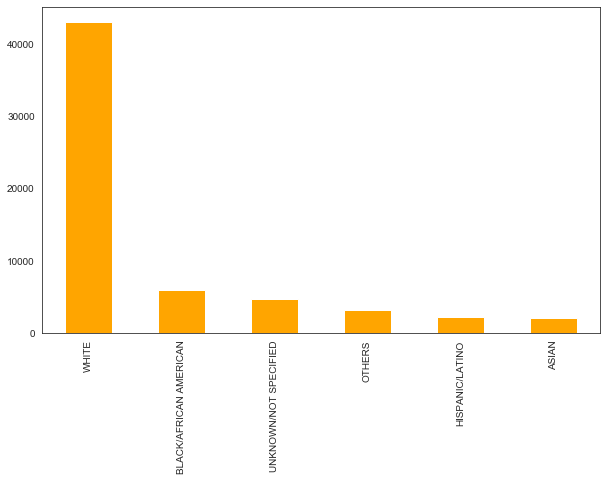

In [177]:
#visualize again to check if everyting looks good. 
plt.figure(figsize = (10, 6))
saps['ETHNICITY'].value_counts().plot(kind='bar', color='orange')

In [129]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    y = [ 'Systolic Blood Pressure',
          'Temprature',
          'Urine Output Level',
          'On Mechanical Ventilation'
          'Heart Rate',
          'Glasgow Coma Score',
          'Underlying Chronic Deases',
          'Blood Urea Nitrogen Level',
          'Blood Bilirubin Level',
          'Blood Bicarbonate Level',
          'Blood Sodium Level',
          'White Blood Cell Counts', 
          'Blood Potassium Level'],  
    x = [82.5,78,75,59,56.4,52,22,19,10,9.5,4,4, 2.5],
    name = 'Outside Normal Range',
    orientation = 'h',
    marker = dict(
    color='rgba(201, 10, 20, 1)',
    line=dict(color='rgba(246, 78, 139, 1.0)', width=1)
    )
))
fig.add_trace(go.Bar(
    y = [ 'Systolic Blood Pressure',
          'Temprature',
          'Urine Output Level',
          'On Mechanical Ventilation'
          'Heart Rate',
          'Glasgow Coma Score',
          'Underlying Chronic Deases',
          'Blood Urea Nitrogen Level',
          'Blood Bilirubin Level',
          'Blood Bicarbonate Level',
          'Blood Sodium Level',
          'White Blood Cell Counts', 
          'Blood Potassium Level'],  
   x = [17.5,22,25,41,43.6,48,78,81,90,90.5,96,96, 97.5], 

    name = 'Normal Range',
    orientation = 'h',
    marker = dict(
    color='rgba(0, 140, 255, 1)',
    line=dict(color='rgba(246, 78, 139, 1.0)', width=1)
    )
))
      
fig.update_layout(barmode='stack', title='ICU Patients Physiological Levels')
fig.show()   


## Results 1: 
### Descriptive Statistics

+ A total of 46,234 unique ICU patients were included in this study. Around 286 were lost during data cleaning. The original MIMIC-IIIv1.4 database has a total population of 46,520 patients.
+ There are 60,517 unique Intensive Care Unit(ICU) stays, some patients were addmitted to ICU more than once. The entire MIMIC-IIIv1.4 datasets has 61,532 ICU stays. Only one ICU stay per hospital amission were included in the study, as a result 1,015 ICU stays from the original database were excluded. Sometiems patients admitted to ICU were discharged to other wards in the hospital and in some cases return back to ICU such patients were not included in this study. 
+ 56% of the patients were Male and 44% were female. 
+ Study participants average age was 65 years old. Patients who are older than 89 years old at any time in the database have had their date of birth shifted to obscure their age and comply with HIPAA. The shift process was as follows:the patient’s age at their first admission was determined. The date of birth was then set to exactly 300 years before their first admission.  
+ The majority of patients (75%) were adults (above 18 years old) and 25% were children (18 and below). 
+ The majority of patients (70%) were whites, African Americans (10%), Asians (3%), and Hispanic/Lations were (4%). 
+ The majority of patients (42%) were married and 35% reported to Catholic as their religion.
+ The majority of patients (75%) were admited to ICU unschedulled. 
+ Almost half of the patients have Medicare (49%). This is not surpirse as the average patient age was 65. A total of 38% of the ICU patients were covered by private insurance. 10% of the ICU patients were used medicaid insurance and 1% of patients self-paid.  
+ On average, patients stayed at ICU for 5 days. 
+ 10% of ICU patients deceassed during thier ICU stay. 
+ Including both deaths within the hospital and deaths identified by matching thte patient to the social security master death index, 39.5% of study participants were deceased.
+ A total of 22% of ICU patients had underlying chronic deases - Metastatic Cancer (8.7%), Hematologic Malignancy (2.4%), and AIDS (0.6%). 
+ A total of 19% of ICU patients had blood urea nitrogen level outside of the normal range within the first 24 hours of ICU stay. 
+ 9.5% of ICU patients had blood bicarbonate level outside of the normal range within the first 24 hours of ICU stay.
+ 59% of ICU patients were on mechanical ventilation within the first 24 hours of ICU stay. 
+ 78% of ICU patients had temprature above normal within the first 24 hours of ICU stay. 
+ 10% of ICU patients had above normal blood bilirubin levels within the first 24 hours of ICY stay. 
+ 52% of ICU patients had Glasgow Coma Score of less than 14 (below the normal range) within the first 24 hours of ICU stay. 
+ 2.5% of ICU patients had blood potassium level outside of the normal range within the first 24 hours of ICU stay.
+ 4% of ICU patients had blood sodium level outside of the normal range within the first 24 hours of ICU stay.
+ 4% of ICU patients had white blood cell counts outside of the normal range within the first 24 hours of ICU stay. 
+ 56.4% of ICU patients had heart rate outside of the normal range within the first 24 hours of ICU stay.
+ 6% of ICU patients experianced cardiac arrest the first 24 hours of ICU stay
+ 82.5% of ICU patients had systolic blood pressure outside of the normal range within the first 24 hours of ICU stay.
+ 75% of ICU patients had urine output level below normal range within the first 24 hours of ICU stay. 

## 2. Demonstrate Correlations

[Text(0.5, 1, 'Correlations: ICU Patients SAPSII Score')]

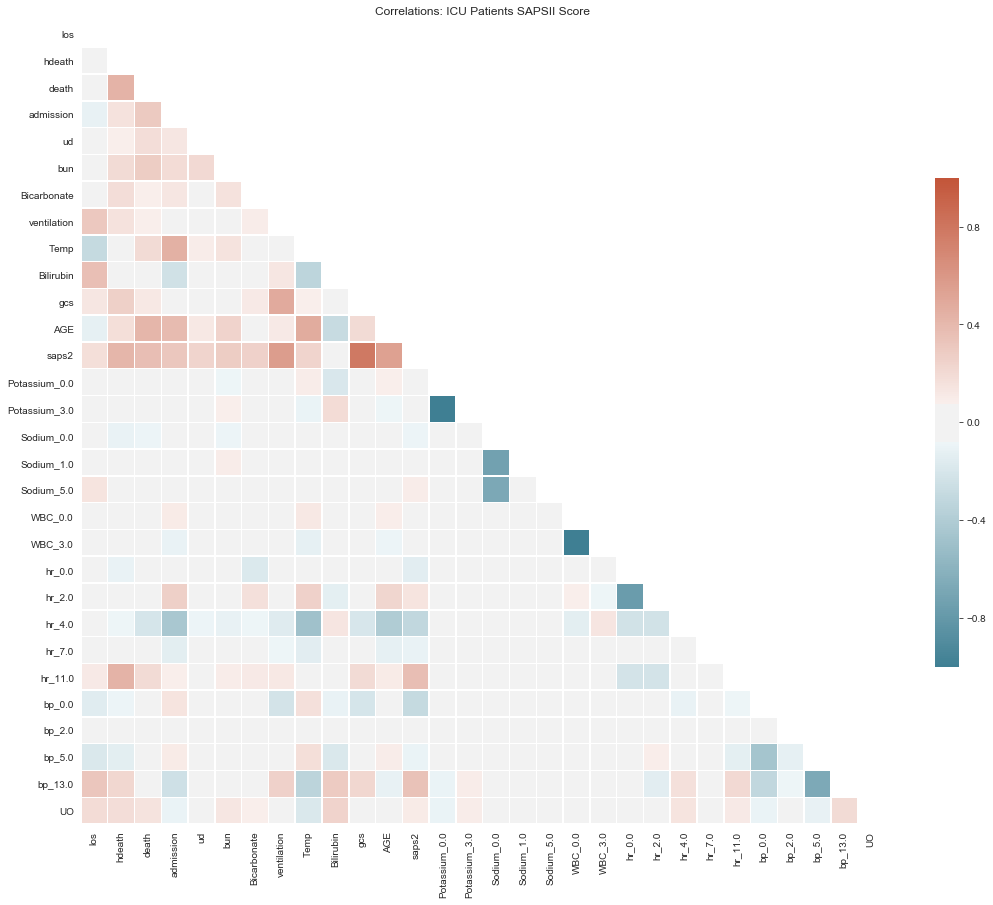

In [142]:
saps=saps.drop(['SUBJECT_ID','HADM_ID', 'ICUSTAY_ID'], axis=1)
# Compute correlations
corr = saps.corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Add diverging colormap
#cmap =sns.diverging_palette(150, 275, s=80, l=55, n=12)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set (title='Correlations: ICU Patients SAPSII Score')

In [144]:
# Correlations of numerical values
saps.corr()['hdeath'].sort_values()

bp_5.0          -0.135879
hr_0.0          -0.106079
Sodium_0.0      -0.102613
bp_0.0          -0.092186
hr_4.0          -0.083538
WBC_0.0         -0.066560
hr_2.0          -0.055233
Potassium_0.0   -0.044101
hr_7.0          -0.026656
bp_2.0          -0.017075
Temp             0.007418
los              0.038376
Potassium_3.0    0.044101
Bilirubin        0.064975
WBC_3.0          0.066560
Sodium_5.0       0.067255
Sodium_1.0       0.076217
ud               0.085655
ventilation      0.162126
admission        0.162633
AGE              0.174295
UO               0.184033
Bicarbonate      0.186168
bun              0.203030
bp_13.0          0.226155
gcs              0.262179
saps2            0.421423
death            0.433143
hr_11.0          0.433746
hdeath           1.000000
Name: hdeath, dtype: float64

In [145]:
# Correlations of numerical values
saps.corr()['death'].sort_values()

hr_4.0          -0.206029
Sodium_0.0      -0.086233
Bilirubin       -0.065717
hr_7.0          -0.062670
bp_0.0          -0.030573
hr_0.0          -0.004219
bp_5.0          -0.002464
Potassium_3.0   -0.000401
WBC_0.0         -0.000081
WBC_3.0          0.000081
Potassium_0.0    0.000401
los              0.007898
bp_2.0           0.019057
hr_2.0           0.021176
bp_13.0          0.022891
Sodium_5.0       0.049146
Sodium_1.0       0.070888
ventilation      0.082251
Bicarbonate      0.082257
gcs              0.124120
UO               0.153244
ud               0.181802
Temp             0.197986
hr_11.0          0.199236
bun              0.287472
admission        0.297403
saps2            0.367351
AGE              0.416355
hdeath           0.433143
death            1.000000
Name: death, dtype: float64

## Results 2: 
### Correlations

+ The heat map above provides a wholestic picture of where the correlation between variables of interest stands. Light teal-to-dark teal color represents negative correlation between two corrosponding variables. Light red to dark red color represents positive correlation between two corrosponding variables (columns). The darker the color, the stronger the correlation.
+ Generally speaking there is correlation (although weak - between 2 and -2) with all of the phsyilogical variables. 
+ Cardiac arrest (hr_11) is strongly correlated (43.4%) with hospital death, morethan the total SAPSII score - created as a combined score of all 17 phsiological variables.
+ Extreme levels of systolic blood pressure (below 70mmHg) and low levels of Glasgow Coma Score were correlatd with within hospital death. 
+ When we change the target variable from death within hospital death to death - including both deaths within the hospital and deaths identified by matching thte patient to the social security master death index, we observe, expectedly age playing key role (correlation score increased from 17% to 42%). 


## 3. Show Distributions and Comparisons 

In [166]:
survived=saps.saps2.loc[saps.hdeath==0]
deceased=saps.saps2.loc[saps.hdeath==1]

<Figure size 792x432 with 0 Axes>

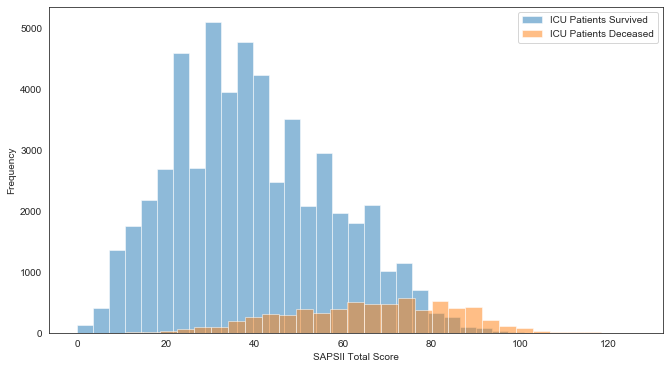

In [167]:
plt.figure(figsize = (11, 6))
_ = plt.hist(survived, bins=30, alpha=0.5, label='ICU Patients Survived')
_ = plt.hist(deceased, bins=30, alpha=0.5, label='ICU Patients Deceased')
_ = plt.xlabel('SAPSII Total Score')
_ = plt.ylabel('Frequency')
_ = plt.legend()

In [169]:
# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats
# Calculate percentile for SAPSII Total Score
saps['percentile'] = saps['saps2'].apply(lambda x: percentileofscore(saps['saps2'], x))

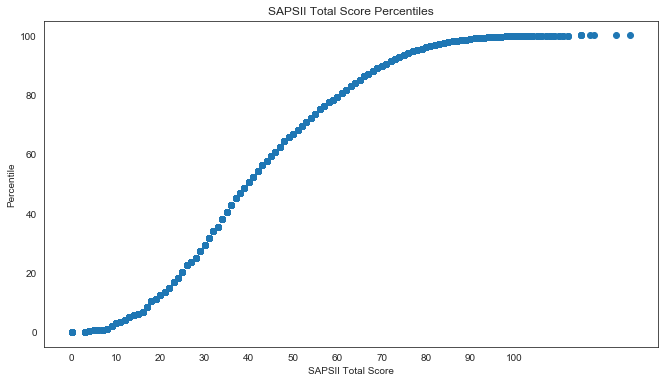

In [170]:
# Plot percentiles for SAPSII Total Score
plt.figure(figsize = (11, 6))
plt.plot(saps['saps2'], saps['percentile'], 'o')
plt.xticks(range(0, 110, 10), range(0, 110, 10))
plt.xlabel('SAPSII Total Score'); plt.ylabel('Percentile'); plt.title('SAPSII Total Score Percentiles');

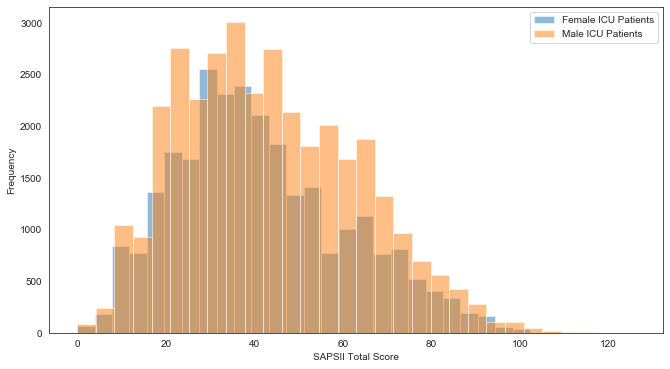

In [165]:
plt.figure(figsize = (11, 6))
Female=saps.saps2.loc[saps.GENDER=='F']
Male=saps.saps2.loc[saps.GENDER=='M']

_ = plt.hist(Female, bins=30, alpha=0.5, label='Female ICU Patients')
_ = plt.hist(Male, bins=30, alpha=0.5, label='Male ICU Patients')
_ = plt.xlabel('SAPSII Total Score')
_ = plt.ylabel('Frequency')
_ = plt.legend()

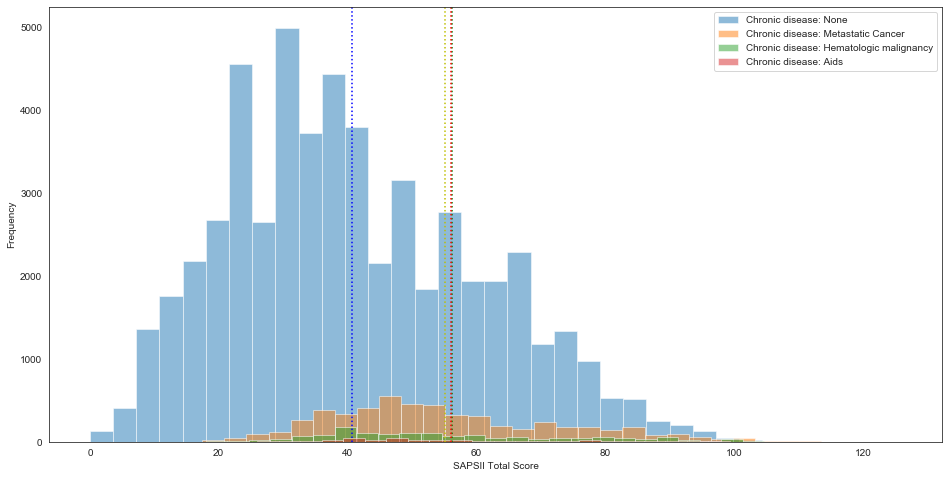

In [184]:
plt.figure(figsize = (16, 8))

no_chronic=saps.saps2.loc[saps.ud==0]
aids=saps.saps2.loc[saps.ud==17]
malignancy=saps.saps2.loc[saps.ud==10]
metastatic=saps.saps2.loc[saps.ud==9]


_ = plt.hist(no_chronic, bins=30, alpha=0.5, label='Chronic disease: None')
_ = plt.hist(metastatic, bins=30, alpha=0.5, label='Chronic disease: Metastatic Cancer')
_ = plt.hist(malignancy, bins=30, alpha=0.5, label='Chronic disease: Hematologic malignancy')
_ = plt.hist(aids, bins=30, alpha=0.5, label='Chronic disease: Aids')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('SAPSII Total Score')
_ = plt.legend()
_ = plt.axvline(np.mean(no_chronic), color='b', linestyle=':')
_ = plt.axvline(np.mean(metastatic), color='y', linestyle=':')
_ = plt.axvline(np.mean(malignancy), color='g', linestyle=':')
_ = plt.axvline(np.mean(aids), color='r', linestyle=':')

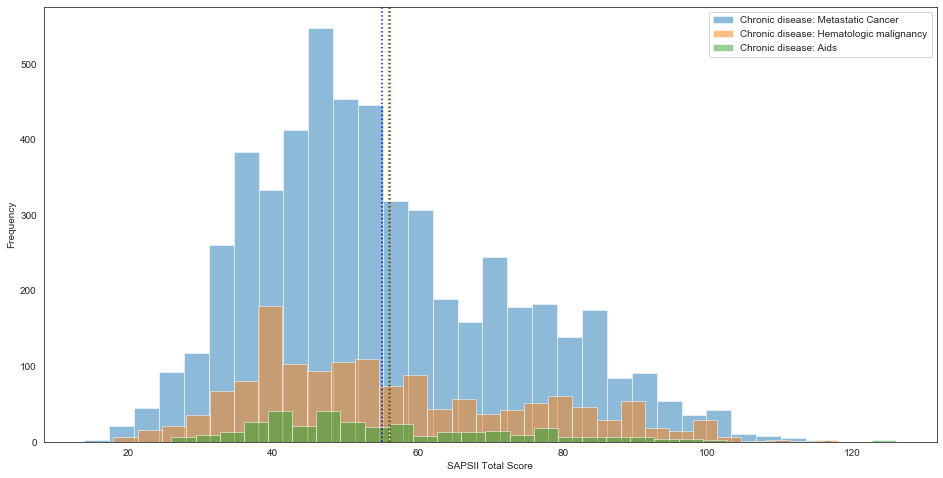

In [185]:
plt.figure(figsize = (16, 8))

aids=saps.saps2.loc[saps.ud==17]
malignancy=saps.saps2.loc[saps.ud==10]
metastatic=saps.saps2.loc[saps.ud==9]


_ = plt.hist(metastatic, bins=30, alpha=0.5, label='Chronic disease: Metastatic Cancer')
_ = plt.hist(malignancy, bins=30, alpha=0.5, label='Chronic disease: Hematologic malignancy')
_ = plt.hist(aids, bins=30, alpha=0.5, label='Chronic disease: Aids')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('SAPSII Total Score')
_ = plt.legend()
_ = plt.axvline(np.mean(metastatic), color='b', linestyle=':')
_ = plt.axvline(np.mean(malignancy), color='r', linestyle=':')
_ = plt.axvline(np.mean(aids), color='g', linestyle=':')

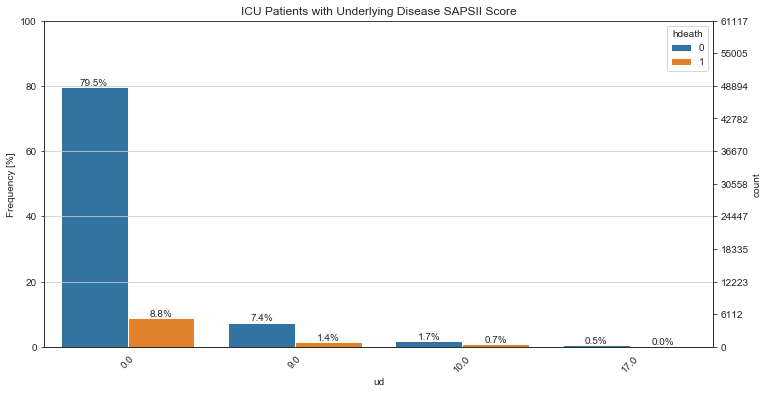

In [39]:
plt.figure(figsize=(12,6))
ax=sns.countplot(data=saps, x='ud', hue='hdeath')
ncount = len(saps)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
ax.set_title('ICU Patients with Underlying Disease SAPSII Score')
# And use a MultipleLocator to ensure a tick spacing of 20
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)


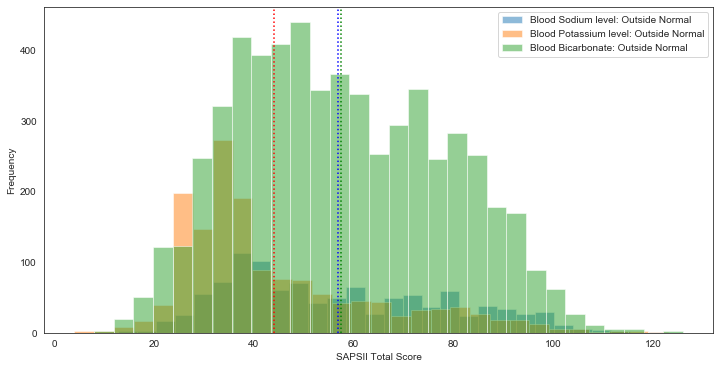

In [186]:
plt.figure(figsize = (12, 6))

sod=saps.saps2.loc[saps['Sodium_5.0']==1] 
pot=saps.saps2.loc[saps['Potassium_3.0']==1]
bic=saps.saps2.loc[saps.Bicarbonate>0]

_ = plt.hist(sod, bins=30, alpha=0.5, label='Blood Sodium level: Outside Normal')
_ = plt.hist(pot, bins=30, alpha=0.5, label='Blood Potassium level: Outside Normal')
_ = plt.hist(bic, bins=30, alpha=0.5, label='Blood Bicarbonate: Outside Normal')
_ = plt.xlabel('SAPSII Total Score')
_ = plt.ylabel('Frequency')
_ = plt.legend()
_ = plt.axvline(np.mean(sod), color='b', linestyle=':')
_ = plt.axvline(np.mean(pot), color='r', linestyle=':')
_ = plt.axvline(np.mean(bic), color='g', linestyle=':')

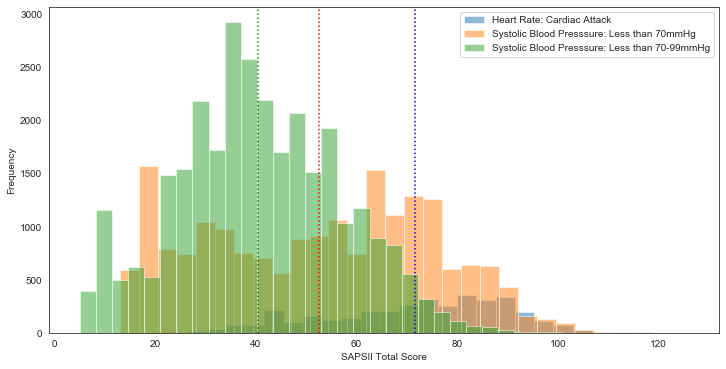

In [175]:
plt.figure(figsize = (12, 6))

hr11=saps.saps2.loc[saps['hr_11.0']==1] 
bp13=saps.saps2.loc[saps['bp_13.0']==1]
bp5=saps.saps2.loc[saps['bp_5.0']==1]

_ = plt.hist(hr11, bins=30, alpha=0.5, label='Heart Rate: Cardiac Attack')
_ = plt.hist(bp13, bins=30, alpha=0.5, label='Systolic Blood Presssure: Less than 70mmHg')
_ = plt.hist(bp5, bins=30, alpha=0.5, label='Systolic Blood Presssure: Less than 70-99mmHg')
_ = plt.xlabel('SAPSII Total Score')
_ = plt.ylabel('Frequency')
_ = plt.legend()
_ = plt.axvline(np.mean(hr11), color='b', linestyle=':')
_ = plt.axvline(np.mean(bp13), color='r', linestyle=':')
_ = plt.axvline(np.mean(bp5), color='g', linestyle=':')

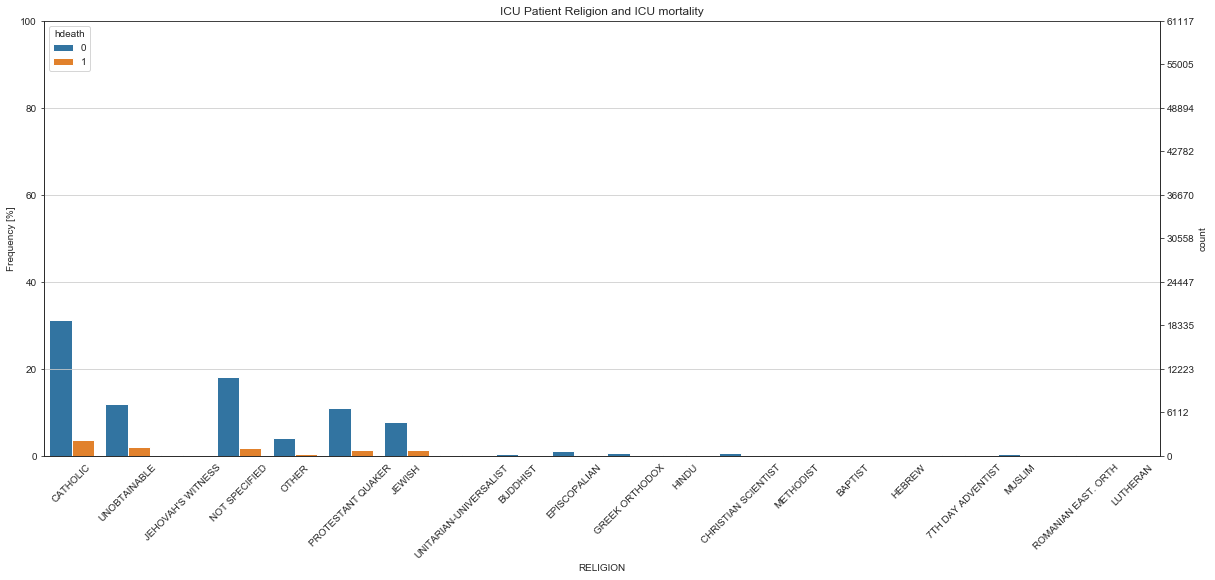

In [44]:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=saps, x='RELIGION', hue='hdeath')
ncount = len(saps)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
   # ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            #ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
ax.set_title('ICU Patient Religion and ICU mortality')
# And use a MultipleLocator to ensure a tick spacing of 20
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)


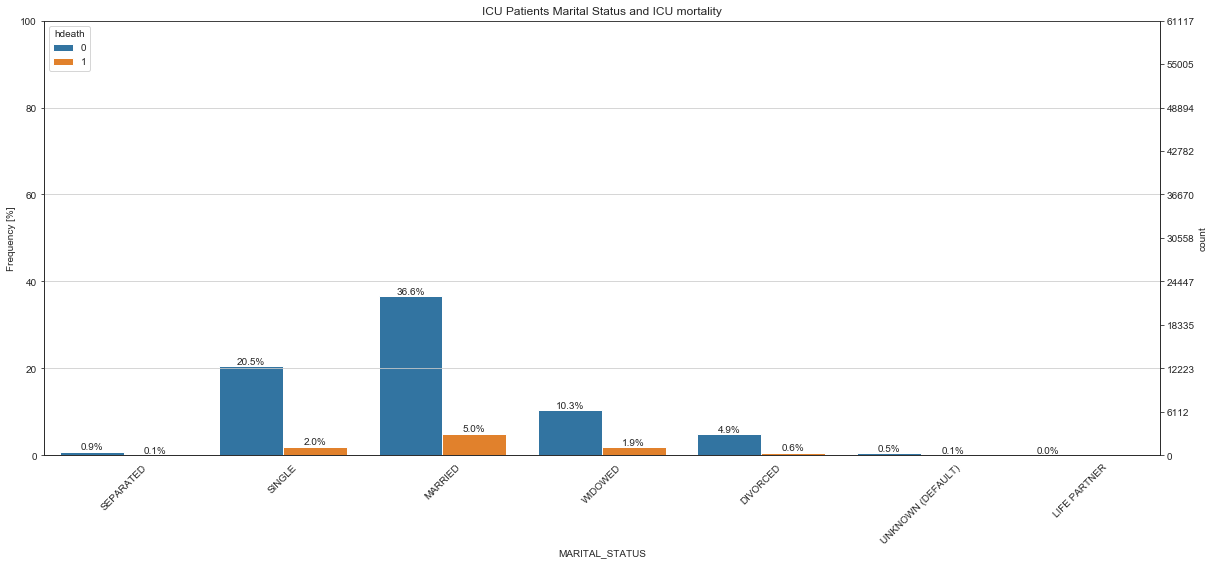

In [41]:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=saps, x='MARITAL_STATUS', hue='hdeath')
ncount = len(saps)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
ax.set_title('ICU Patients Marital Status and ICU mortality')
# And use a MultipleLocator to ensure a tick spacing of 20
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)


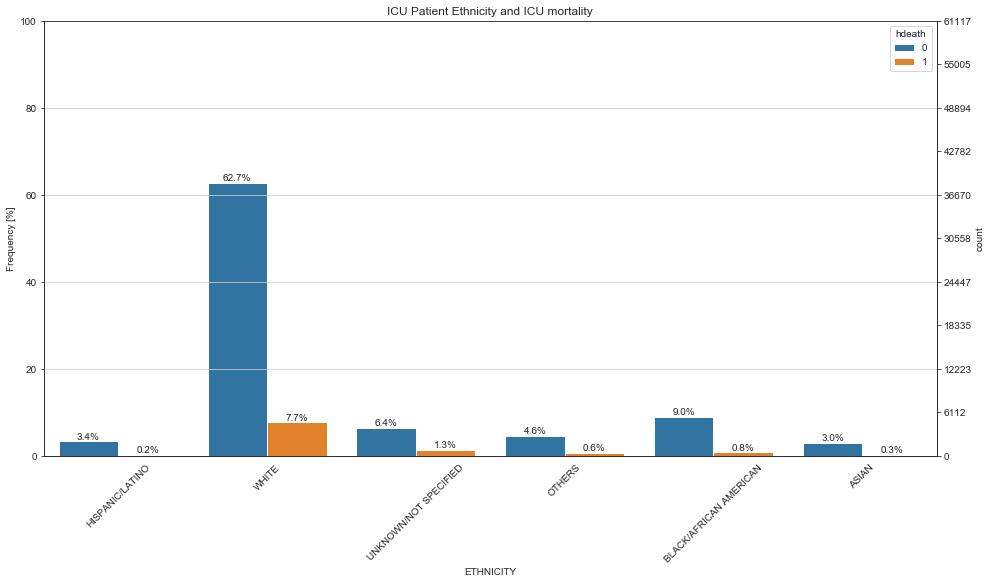

In [79]:
plt.figure(figsize=(16,8))
ax=sns.countplot(data=saps, x='ETHNICITY', hue='hdeath')
ncount = len(saps)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
ax.set_title('ICU Patient Ethnicity and ICU mortality')
# And use a MultipleLocator to ensure a tick spacing of 20
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)


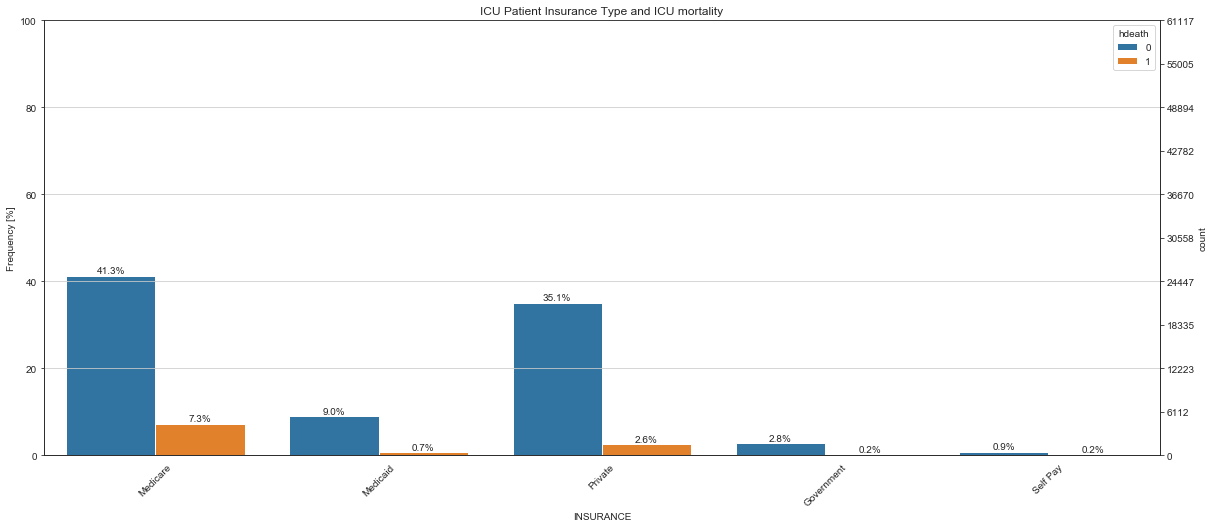

In [45]:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=saps, x='INSURANCE', hue='hdeath')
ncount = len(saps)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
ax.set_title('ICU Patient Insurance Type and ICU mortality')
# And use a MultipleLocator to ensure a tick spacing of 20
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)


## Results 3: 
### Distributions and Comparisions 

+ ICU patients distributed towards higher SAPSII total score. Majority proportion of ICU patients with a total SAPSII score of 70 and above have deceased. 
+ The percentile of score cumulative distribution shows after SAPSII total score of 30,the percentile of ICU patients increased faster platuing at SAPSII total score of 80. 
+ There is an overlaping normal distribution of SAPSII total score between female and male ICU patients, showing no distirbutional diffrence between male and female ICU patients' SAPSII total score.   
+ Patients with underlying disease are distributed to the right of the SAPSII total score scale. In other words, those with prexisting chronic diesaes had higher SAPSII score. 
+ Metastatic cancer is the most common underlying chronic disease among ICU patients in this study. 
+ The distribution of outside normal blood bicarbonate level picked after SAPSII score of 40 and continued to stay high, showing strong relationship with hospital death. The distribution of outside normal blood sodium and blood potassium level picked up at early SAPSII score of 30 showing the prevalence of abnormal sodium and potassium level is common among ICU patients and may have little contribution to the classification of surviving and deceased ICU patients in this study. 
+ Population of ICU patients with extreme heart rate (experianced cardiac arrest) are distributed to the extreme right of SAPSII total score, the majority scoring an average of 75 in their SAPSII score
+ There is 'no' diffrence in the distribution of hospital death by religion denomination. Majority of the ICU patients are member of the catholic church. 
+ also the distribution of hospital death is proportional to patients' marital status and ethinicity. 
+ We observe distribution of high hospital death among medicare insurance holders, here the key player is likely age and underlying diease, not insurance type. Generally, Medicare is available for people age 65 or older, younger people with disabilities and people with End Stage Renal Disease (permanent kidney failure requiring dialysis or transplant). 

## 4. Regressions 

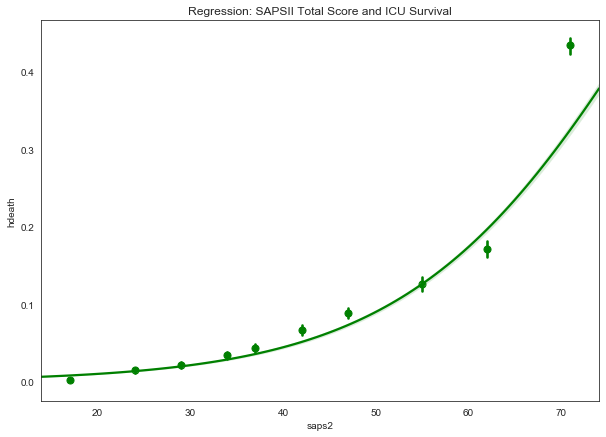

In [179]:
# Logistic Regression plots - regplot
fig, ax=plt.subplots(figsize=(10,7))
sns.regplot(data=saps, x= 'saps2', y='hdeath', logistic=True, color='g', x_bins=10, ax=ax)
ax.set (title='Regression: SAPSII Total Score and ICU Survival')
plt.show()


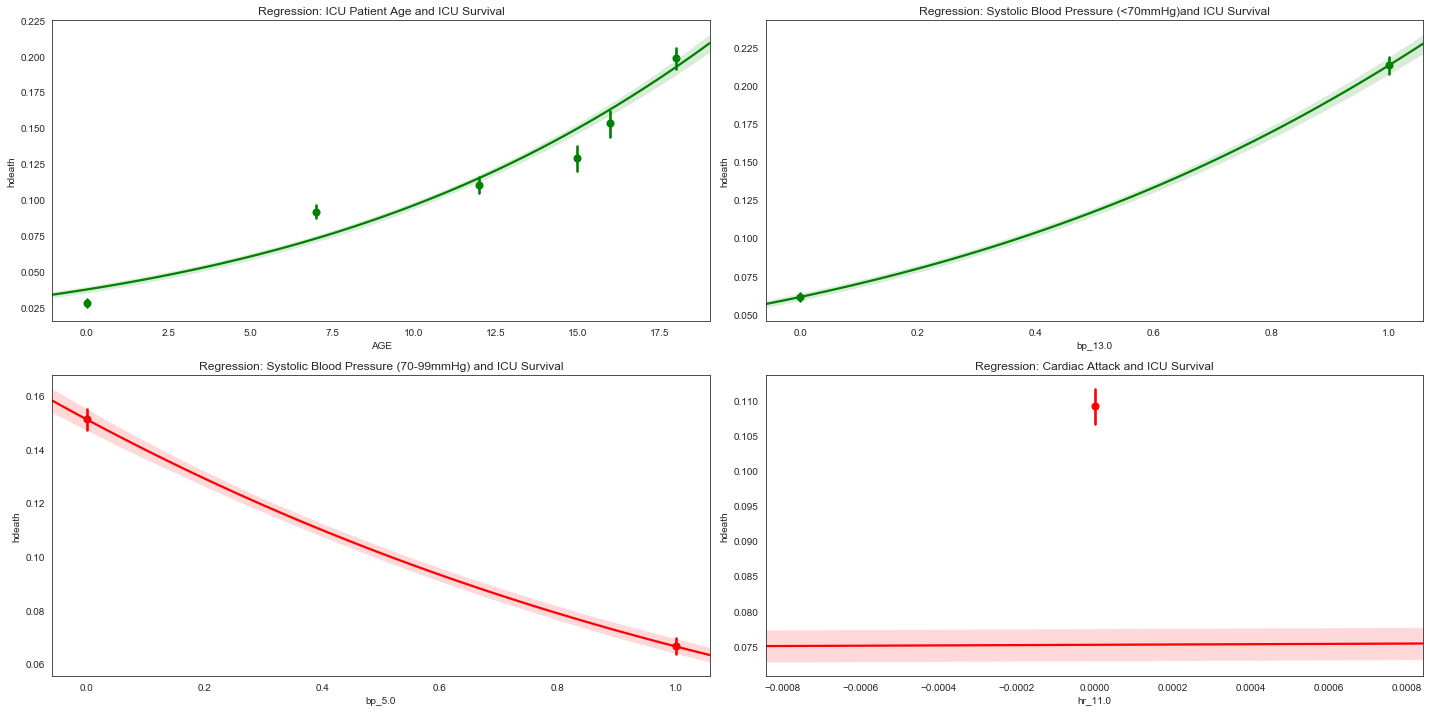

In [180]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
_ = sns.regplot(data=saps, x= 'AGE', y='hdeath',logistic=True, color='g', x_bins=10)
_ = plt.title('Regression: ICU Patient Age and ICU Survival')
plt.subplot(2, 2, 2)
_ = sns.regplot(data=saps, x= 'bp_13.0', y='hdeath', logistic=True, color='g', x_bins=10)
_ = plt.title('Regression: Systolic Blood Pressure (<70mmHg)and ICU Survival')
plt.subplot(2, 2, 3)
_ = sns.regplot(data=saps, x= 'bp_5.0', y='hdeath', logistic=True, color='r', x_bins=10)
_ = plt.title('Regression: Systolic Blood Pressure (70-99mmHg) and ICU Survival')
plt.subplot(2, 2, 4)
_ = sns.regplot(data=saps, x= 'hr_11.0', y='hdeath' , logistic=True, color='r', x_bins=10)
_ = plt.title('Regression: Cardiac Attack and ICU Survival')
plt.tight_layout()

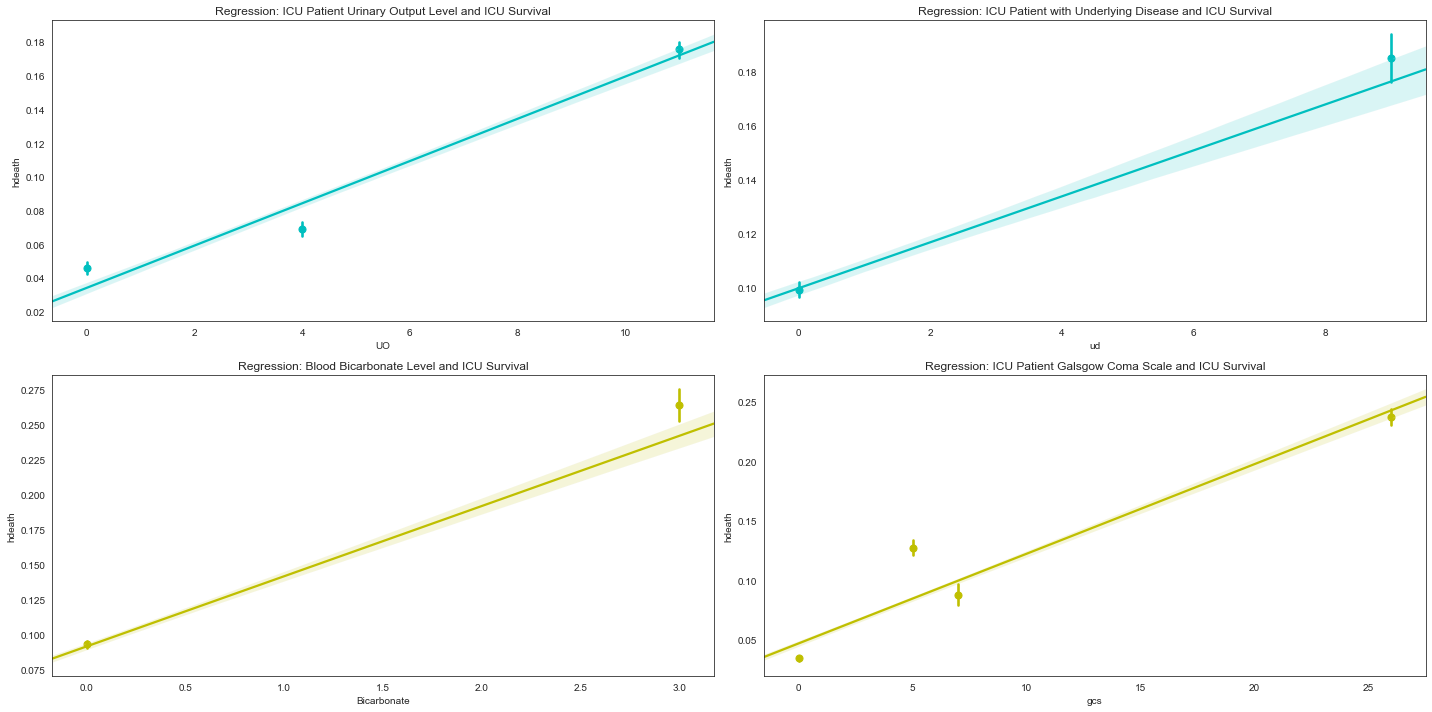

In [181]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
_ = sns.regplot(data=saps, x= 'UO', y='hdeath' , color='c', x_bins=10)
_ = plt.title('Regression: ICU Patient Urinary Output Level and ICU Survival')
plt.subplot(2, 2, 2)
_ = sns.regplot(data=saps, x= 'ud', y='hdeath' , color='c', x_bins=10)
_ = plt.title('Regression: ICU Patient with Underlying Disease and ICU Survival')
plt.subplot(2, 2, 3)
_ = sns.regplot(data=saps, x= 'Bicarbonate', y='hdeath' , color='y', x_bins=10)
_ = plt.title('Regression: Blood Bicarbonate Level and ICU Survival')
plt.subplot(2, 2, 4)
_ = sns.regplot(data=saps, x= 'gcs', y='hdeath' , color='y', x_bins=10)
_ = plt.title('Regression: ICU Patient Galsgow Coma Scale and ICU Survival')
plt.tight_layout()

## Results 4
### Logistic Regression Plots 

+ There is a strong positive relationship between SAPSII total score and the probability of hospital mortality. The probability of hospital mortality starts to escalate after SAPSII total score of 50.   
+ Values in x-axis are SAPSII scores for the specific variable - not the actual values. For example age values are not exact patient age, rather SAPSII score that corspondes to the patient age. 
+ Patient age, extreme levels of systolic blood pressure (less than 70mmHg), blood bicarbonate level, pateint's galsgow comma score, urinary output level, and presence of underliying chronic diseas is stronlgy associated with hospital death. This relationship diminishes when control for 'CHILD' variable. 
+ Although we have seen strong positive correlation between cardiac arrest and hospital death, the logistic regression plot did not show the same.
+ For patients above 80 years old, their age increases their likelihood of hospital death by about 20%. 
+ Patients with extream blood pressure (less than 70mmHg) the first 24 hours of their hospital stay increased their likelihood of hospital mortality by 17%. 
+ Patients with sever urinary output level (less than 500mL) within the first 24 hours of their ICU stay increased their likelihood of hospital mortality by around 16%. 
+ patients with low blood bicarbonate levels within the first 24 hours of ICU stay increased their chances of hospital mortability by  around 15%
+ patients with underlying disease like AIDS increased their likelihood of hopital mortality by around 8%
+ patients with very low GCS (<6) within the first 24 hours of hospital stay increased their chances of hospitality mortality by around 20%